In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate,  cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import time
from time import time
from sklearn.metrics import roc_auc_score, make_scorer
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('/Users/hidayahzainuddin/Documents/FYP/heart.csv')

In [4]:
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
# Rename the columns for better readability
data.columns = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 
                'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'NumMajorVessels', 'Thal', 'Target']

In [6]:
data.head(1)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,NumMajorVessels,Thal,Target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0


In [7]:
data.shape


(975, 14)

In [8]:
# Checking for missing values
print(data.isnull().sum())

Age                0
Sex                0
ChestPainType      0
RestingBP          0
Cholesterol        0
FastingBS          0
RestingECG         0
MaxHR              0
ExerciseAngina     0
Oldpeak            0
ST_Slope           0
NumMajorVessels    0
Thal               0
Target             0
dtype: int64


In [9]:
# Describe the dataset
data.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,NumMajorVessels,Thal,Target
count,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000
mean,54.478974,0.689231,0.960000,131.808205,246.141538,0.147692,0.523077,148.989744,0.338462,1.078051,1.383590,0.748718,2.320000,0.513846
std,9.123683,0.463046,1.032053,17.548148,51.767452,0.354977,0.523798,23.069974,0.473429,1.182318,0.620109,1.028064,0.618138,0.500065
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


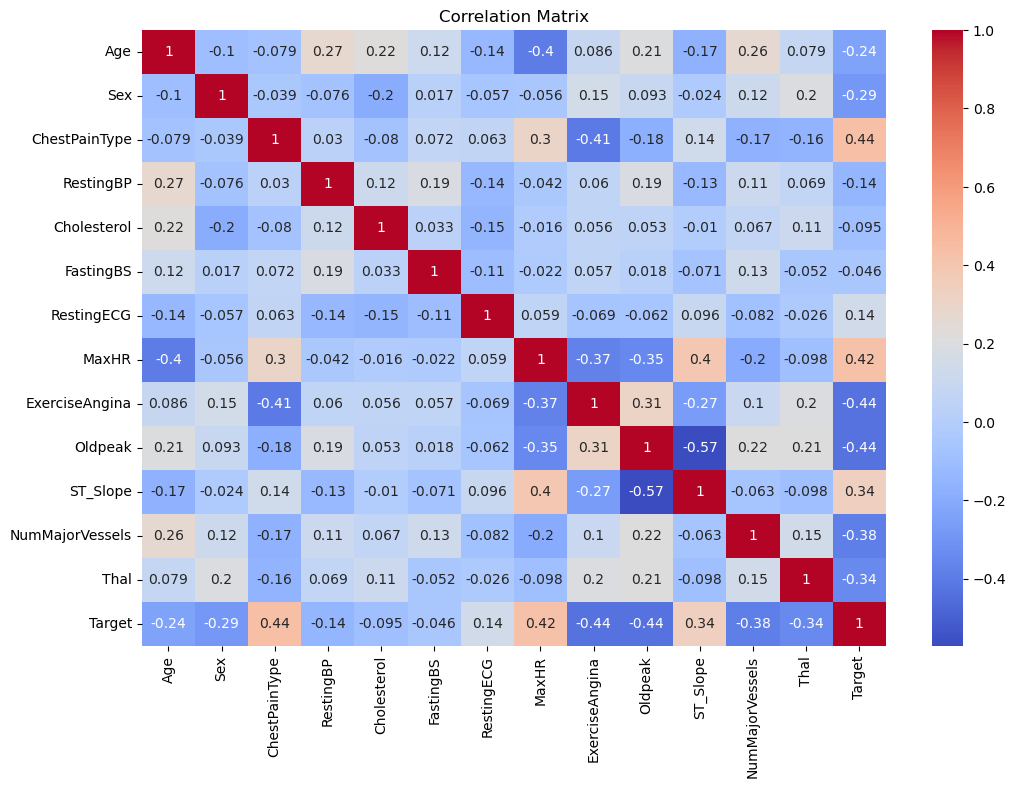

In [10]:
# Plot correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

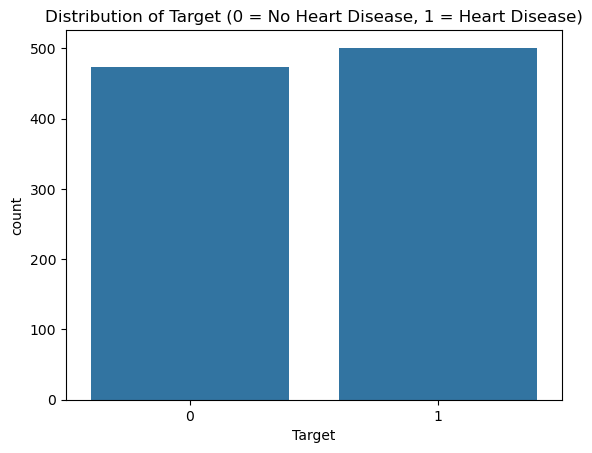

In [11]:
# Plot Target variable distribution
sns.countplot(x='Target', data=data)
plt.title('Distribution of Target (0 = No Heart Disease, 1 = Heart Disease)')
plt.show()

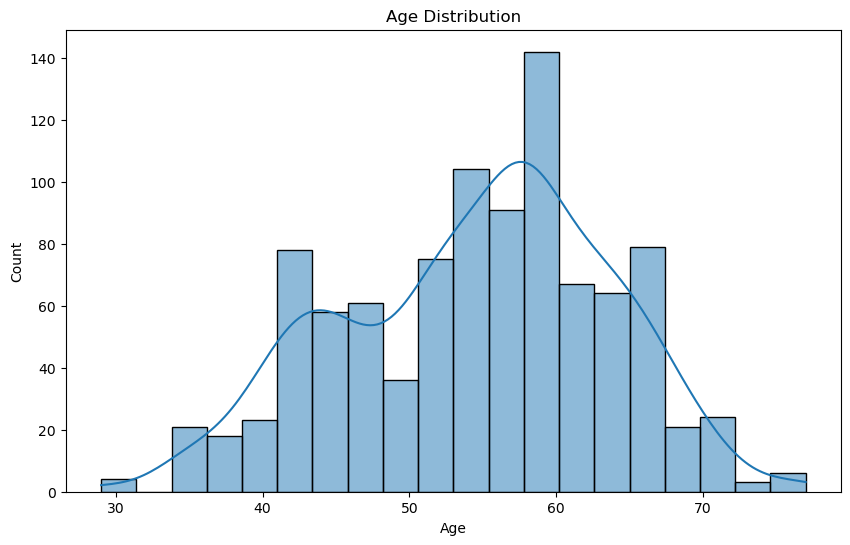

In [12]:
# Plot distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

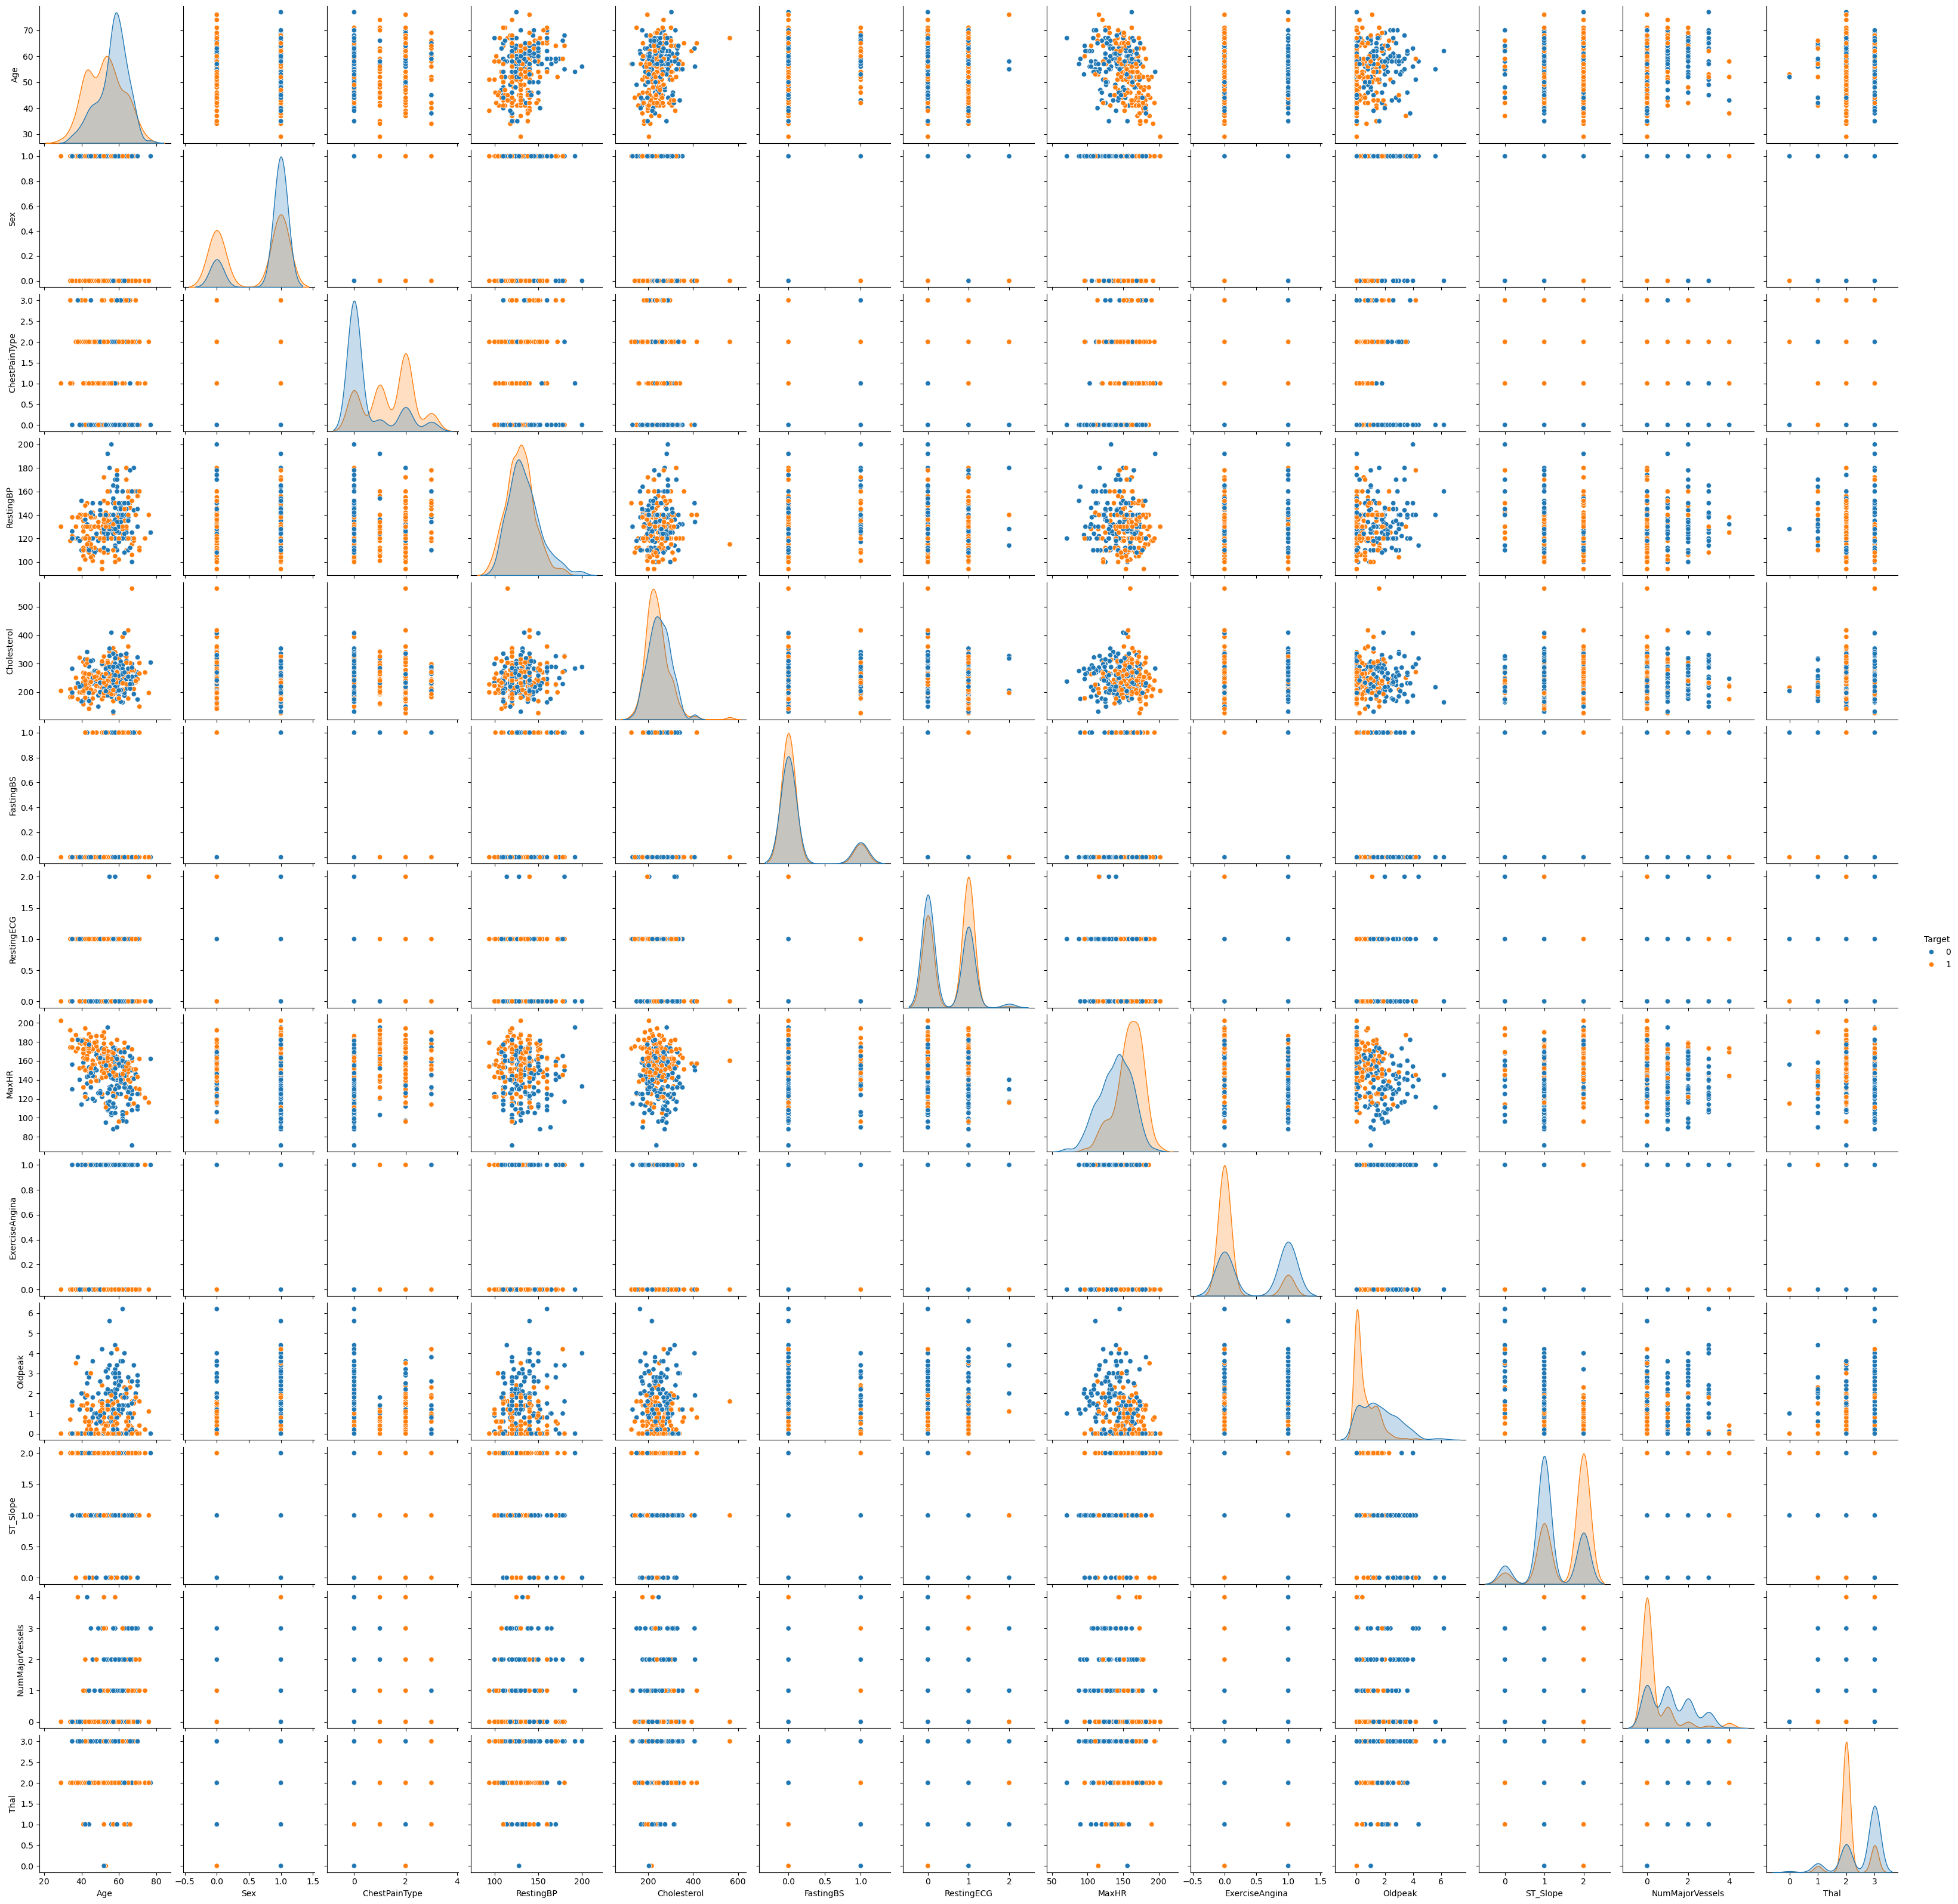

In [13]:
# Pairplot to visualize relationships between features
sns.pairplot(data, hue='Target')
plt.show()

In [14]:
X = data.drop('Target', axis=1)
y = data['Target']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [16]:
# Standardize the feature set
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
# Define the models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Bagging Classifier": BaggingClassifier(),
    "MLP Classifier": MLPClassifier(max_iter=500)
}

In [18]:
# Define the metrics we want to evaluate for each model
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

In [19]:
results = []

# Train and evaluate each model using K-fold cross-validation
for name, model in models.items():
    start_time = time()  # Start the timer
    scores = cross_validate(model, X_train, y_train, cv=5, scoring=scoring, return_train_score=False)
    end_time = time()  # End the timer
    
    # Compute the average of each metric across the folds
    accuracy = np.mean(scores['test_accuracy'])
    precision = np.mean(scores['test_precision'])
    recall = np.mean(scores['test_recall'])
    f1 = np.mean(scores['test_f1'])
    auc = np.mean(scores['test_roc_auc'])
    elapsed_time = end_time - start_time  # Time taken to run the model
        # Store the results in the list
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1,
        "AUC": auc,
        "Time (s)": elapsed_time
    })

    print(f"{name} completed in {elapsed_time:.4f} seconds.")

Logistic Regression completed in 0.0416 seconds.
Random Forest completed in 0.3335 seconds.
SVM completed in 0.0894 seconds.
Decision Tree completed in 0.0175 seconds.
KNN completed in 0.0328 seconds.
Naive Bayes completed in 0.0148 seconds.
Gradient Boosting completed in 0.3346 seconds.
AdaBoost completed in 0.1785 seconds.
Bagging Classifier completed in 0.0755 seconds.
MLP Classifier completed in 3.8371 seconds.


In [20]:
# Convert results into a DataFrame for better visualization
results_df = pd.DataFrame(results)


In [21]:
# Sort by Accuracy (or any other metric of choice)
results_df = results_df.sort_values(by="Accuracy", ascending=False)

In [22]:
# Display the model performance results
results_df

,Model,Accuracy,Precision,Recall,F1-score,AUC,Time (s)
1,Random Forest,0.967690,0.971366,0.965590,0.968237,0.995157,0.333516
9,MLP Classifier,0.966241,0.968429,0.965631,0.966820,0.990286,3.837071
3,Decision Tree,0.963300,0.961494,0.968489,0.964506,0.963213,0.017503
6,Gradient Boosting,0.955947,0.956798,0.956812,0.956746,0.982854,0.334647
8,Bagging Classifier,0.954465,0.970987,0.939669,0.954420,0.990627,0.075475
2,SVM,0.901664,0.896656,0.913706,0.904301,0.962848,0.089381
7,AdaBoost,0.898841,0.897855,0.905259,0.901462,0.960492,0.178541
4,KNN,0.859199,0.839029,0.896563,0.866534,0.941647,0.032753
0,Logistic Regression,0.834253,0.811550,0.882153,0.844935,0.914226,0.041565
5,Naive Bayes,0.824055,0.810482,0.856439,0.832243,0.901437,0.014804


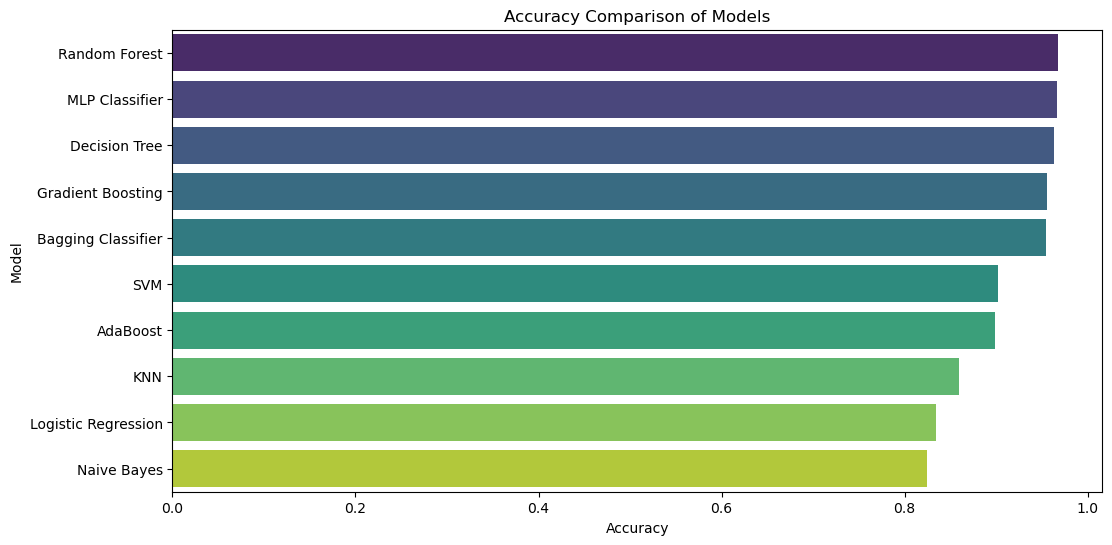

In [23]:
# Plot the model accuracy results
plt.figure(figsize=(12, 6))
sns.barplot(x="Accuracy", y="Model", data=results_df, palette="viridis")
plt.title("Accuracy Comparison of Models")
plt.show()

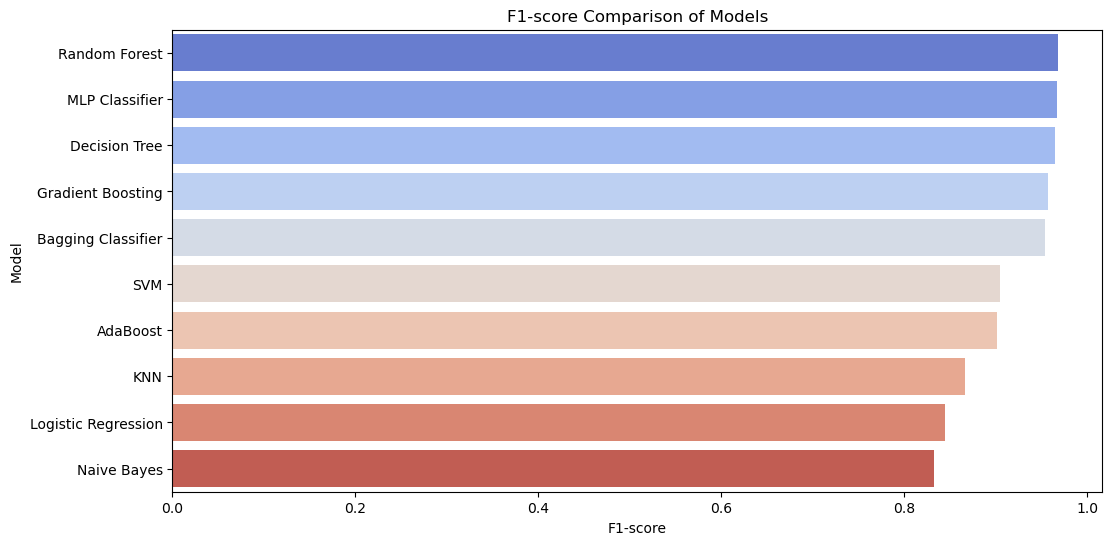

In [24]:
# Plot the F1-score comparison
plt.figure(figsize=(12, 6))
sns.barplot(x="F1-score", y="Model", data=results_df, palette="coolwarm")
plt.title("F1-score Comparison of Models")
plt.show()

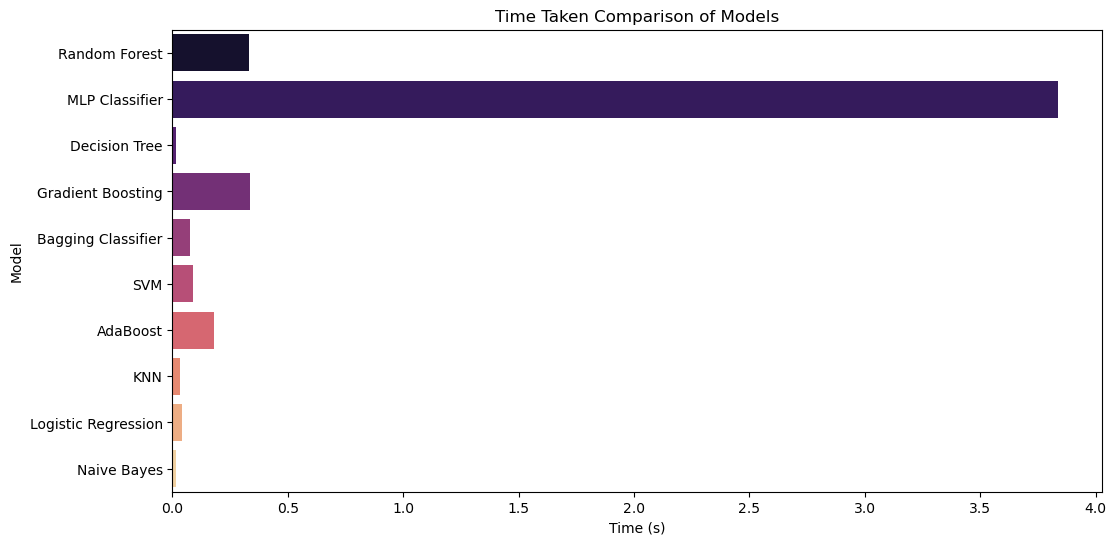

In [25]:
# Plot the time comparison
plt.figure(figsize=(12, 6))
sns.barplot(x="Time (s)", y="Model", data=results_df, palette="magma")
plt.title("Time Taken Comparison of Models")
plt.show()

In [26]:
# Hyperparameter tuning for RandomForestClassifier using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [27]:
# Best parameters and score
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))

Best parameters found: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score: 0.9721


In [28]:
# Evaluating on the test set
best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Test Accuracy after tuning: {accuracy_rf:.4f}")

Random Forest Test Accuracy after tuning: 1.0000


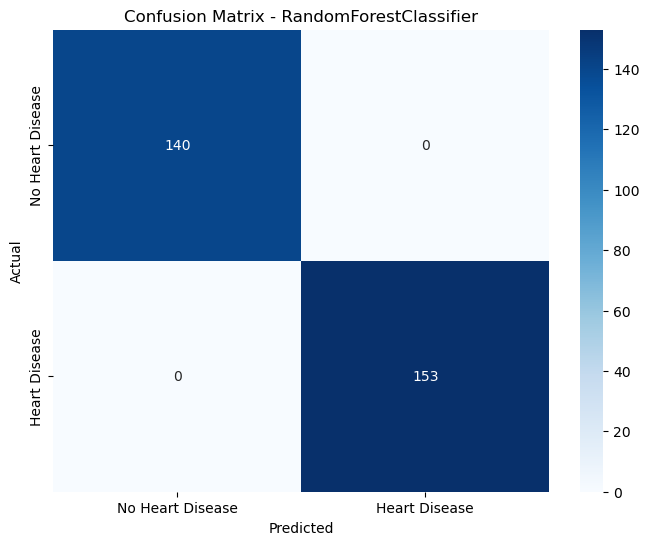

In [29]:
# Generate the confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No Heart Disease', 'Heart Disease'], yticklabels=['No Heart Disease', 'Heart Disease'])
plt.title('Confusion Matrix - RandomForestClassifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [30]:
report_rf = classification_report(y_test, y_pred_rf, target_names=['No Heart Disease', 'Heart Disease'])
print("Classification Report - RandomForestClassifier (After Tuning):")
print(report_rf)

Classification Report - RandomForestClassifier (After Tuning):
                  precision    recall  f1-score   support

No Heart Disease       1.00      1.00      1.00       140
   Heart Disease       1.00      1.00      1.00       153

        accuracy                           1.00       293
       macro avg       1.00      1.00      1.00       293
    weighted avg       1.00      1.00      1.00       293



In [31]:
import joblib
model_filename = 'Random_Forest.pkl'
joblib.dump(best_rf, model_filename)

print(f"Model saved as {model_filename}")

Model saved as Random_Forest.pkl


In [ ]:
# Done